# Importing neceassary libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
# from scipy import interpolate
from itertools import cycle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve
# from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.utils import shuffle

# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam, SGD, RMSprop
# from tensorflow.keras.regularizers import l1, l2
# from scikeras.wrappers import KerasClassifier

# Creating the dataframe

In [77]:
def read_csv_create_train_test(test_split, features):
    """
    test_split (input): The percentage of data that will be used to test
    features (input): Can be 'all', 'anova' or 'extratrees'
    """
    # Specify the pattern for your csv files
    csv_files = glob.glob('*.csv')  # Adjust the path as necessary

    # List comprehension to load all csv files into DataFrames
    dataframes = [pd.read_csv(file) for file in csv_files]

    # Concatenate all DataFrames into one
    combined_dataframe = pd.concat(dataframes, ignore_index=True)

    # Shuffle the dataset to ensure a good mix of data points
    combined_dataframe = shuffle(combined_dataframe, random_state=42)

    # some columns are totally unproductive so let's remove them
    combined_dataframe.drop(['Sample Count'],axis=1,inplace=True)

    if features == 'all':
        # All features
        X = combined_dataframe.drop(['Movement'],axis=1)
    elif features == 'anova':
        # Features based on ANOVA F-Test
        features = ['Mean', 'Skewness', 'Kurtosis', 'Relative Theta Power', 'Relative Alpha Power', 'Relative Beta Power',
                    'Relative Gamma Power', 'Relative Mu Power', 'Entropy', 'Complexity', 'Bispectrum Relative Theta Power',
                    'Bispectrum Relative Alpha Power', 'Bispectrum Relative Beta Power', 'Bispectrum Relative Gamma Power', 'Third Moment']
        X = combined_dataframe.drop(['Movement'],axis=1)
    elif features == 'extratrees':
        # Feature based on ExtraTreesClassifier
        features = ['Relative Theta Power', 'Bispectrum Relative Gamma Power', 'Bispectrum Relative Delta Power', 'Entropy', 'Relative Beta Power', 'Bispectrum Relative Mu Power', 'Bispectrum Relative Theta Power', 'Activity', 'Skewness', 'Zero Crossing Rate']
        X = combined_dataframe[features]
    y = combined_dataframe.Movement

    # Convert labels to one-hot encoding
    # y = to_categorical(y - 1)  # Ensure this matches the classes correctly
    # y = y - 1

    # Splitting the dataset into the Training set and Test set. Stratify should keep all classes of movement balanced
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_split, random_state = 42, stratify=y)

    # Feature Scaling because we don't want one independent variable dominating the other and it makes computations easy
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    return combined_dataframe, X_train, X_test, y_train, y_test

# Heatmap

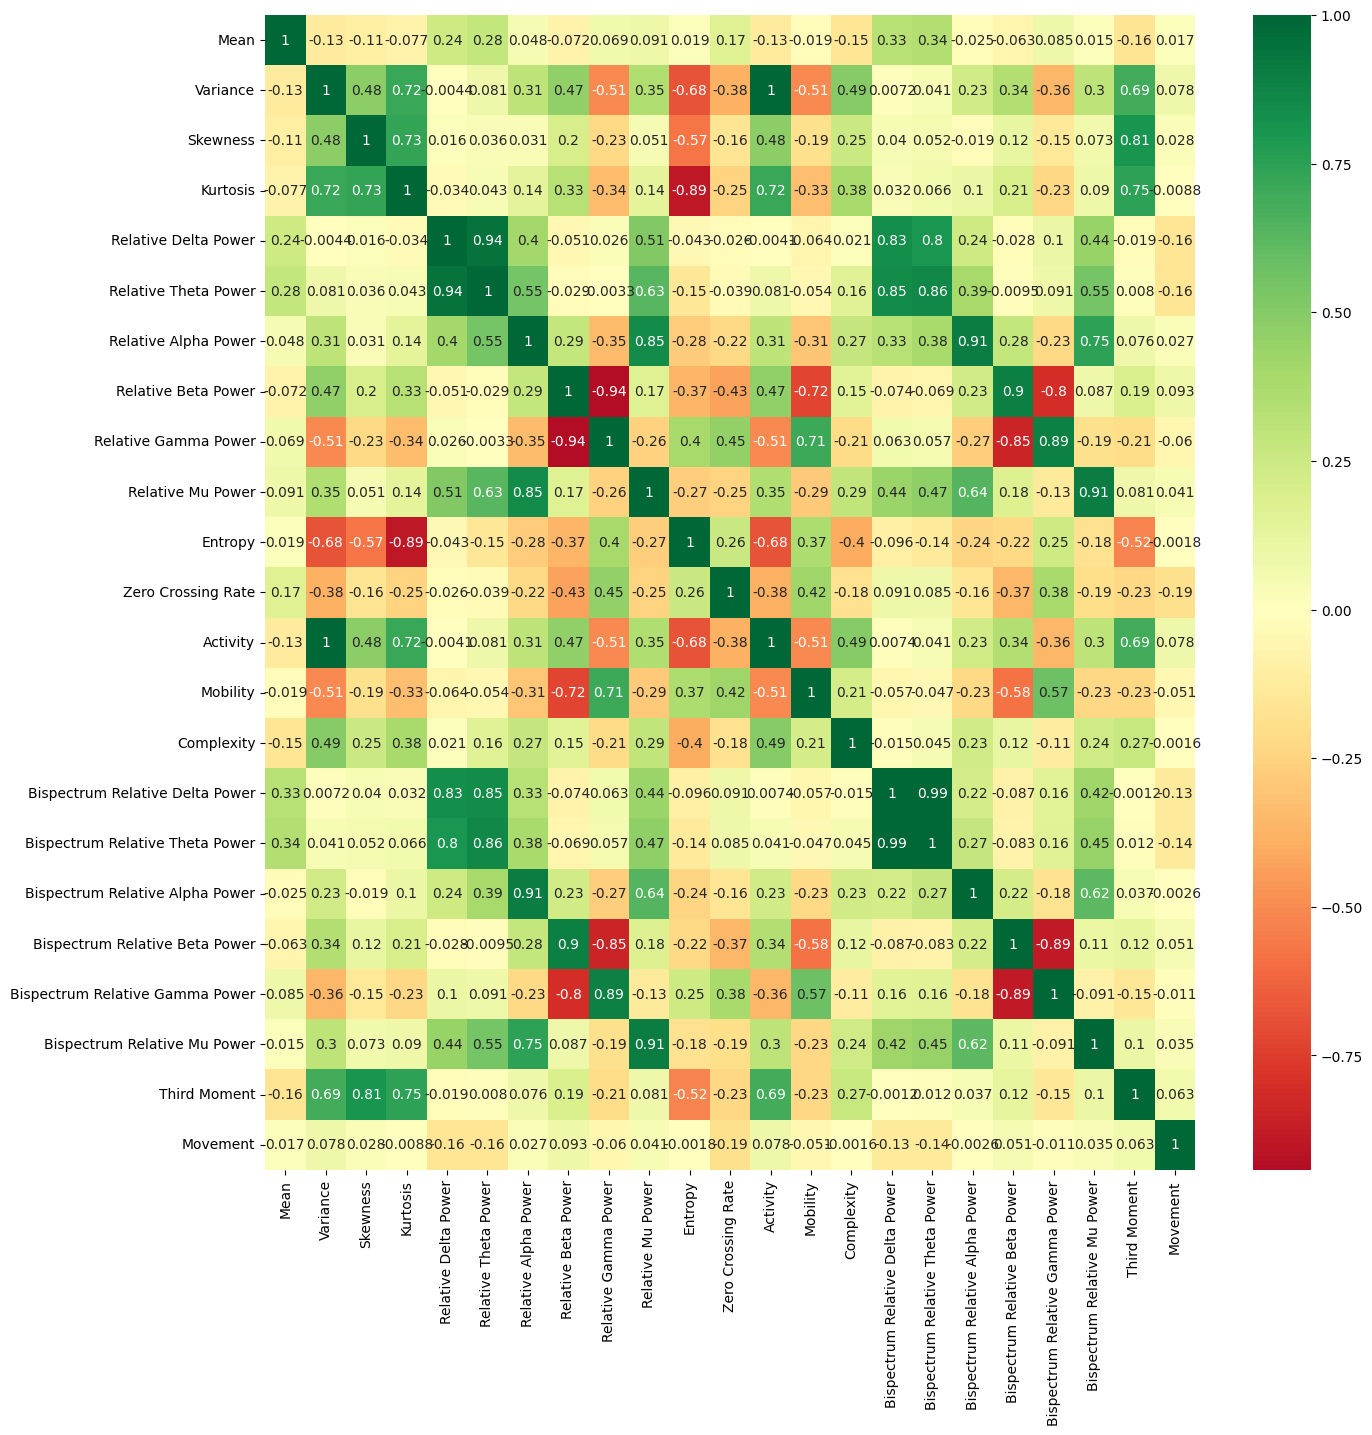

In [69]:
# plt.figure(figsize=(15,15))
# p=sns.heatmap(combined_dataframe.corr(), annot=True,cmap='RdYlGn',center=0)

# Training the Decision Forest

In [70]:
# rf = RandomForestClassifier()

# rf_params = {
#     "n_estimators": [50, 100, 300],
#     "max_depth": [3, 5, 7],
#     "max_features": [2, 4, 6, 8, 10],
#     "min_samples_split": [2, 4, 6, 8]
# }

# rf_cv_model = GridSearchCV(rf, rf_params, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2).fit(X_train, y_train)
# rf_cv_model.best_params_

In [84]:
combined_dataframe, X_train, X_test, y_train, y_test = read_csv_create_train_test(test_split=0.05, features = 'anova')
combined_dataframe

,Mean,Variance,Skewness,Kurtosis,Relative Delta Power,Relative Theta Power,Relative Alpha Power,Relative Beta Power,Relative Gamma Power,Relative Mu Power,...,Mobility,Complexity,Bispectrum Relative Delta Power,Bispectrum Relative Theta Power,Bispectrum Relative Alpha Power,Bispectrum Relative Beta Power,Bispectrum Relative Gamma Power,Bispectrum Relative Mu Power,Third Moment,Movement
78,0.117122,876.788,0.129514,5.87528,0.000077,0.000351,0.008924,0.361954,0.131347,0.008347,...,0.176661,7.30574,3.714860e-08,2.383980e-06,0.001362,0.464440,0.034328,0.001352,3362.4800,0
10,-0.085215,338.797,0.138509,3.60124,0.000121,0.000183,0.003221,0.261461,0.239472,0.001772,...,0.212064,6.97193,1.210250e-07,3.071420e-07,0.000126,0.340004,0.160444,0.000041,863.7480,1
4,-0.023624,425.698,0.831517,8.64309,0.000008,0.000149,0.006486,0.315970,0.198186,0.004691,...,0.192985,5.37464,4.908830e-10,5.125360e-07,0.000603,0.398551,0.115184,0.000474,7303.3700,1
84,0.187502,405.493,0.159720,3.04867,0.000433,0.000413,0.003730,0.318712,0.182587,0.003265,...,0.191109,6.09239,9.260400e-07,1.141240e-06,0.000151,0.443228,0.057330,0.000146,1304.1700,0
64,-0.108476,499.237,0.393620,4.58408,0.000120,0.000313,0.003755,0.348131,0.151035,0.001949,...,0.185356,6.01584,9.068040e-08,8.541180e-07,0.000152,0.459378,0.040665,0.000049,4390.7300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.318869,600.800,0.292392,8.86798,0.000940,0.002287,0.021803,0.349508,0.181559,0.008468,...,0.180525,10.22710,7.411330e-06,6.256890e-05,0.008053,0.424928,0.145791,0.000691,4305.8700,0
14,0.205997,369.288,0.317031,2.86274,0.000572,0.001293,0.014209,0.331474,0.170884,0.008507,...,0.188801,5.04923,2.496010e-06,3.012400e-05,0.002195,0.444106,0.060287,0.000961,2249.8300,1
92,0.225980,240.242,0.019163,2.92238,0.001097,0.001554,0.009970,0.260885,0.238302,0.001900,...,0.211381,4.74166,6.540580e-06,1.376430e-05,0.001794,0.348283,0.151927,0.000025,71.3573,0
51,0.036453,341.873,0.094500,2.47075,0.000019,0.000197,0.002660,0.289867,0.249858,0.002019,...,0.207300,5.67668,2.837570e-09,8.580960e-07,0.000070,0.377125,0.189192,0.000054,597.3510,1


In [85]:
n_estimators = 100
max_depth = 5
max_features = 6
min_samples_split = 4

# Initialize the Random Forest classifier
classifier = RandomForestClassifier(max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split, n_estimators=n_estimators, random_state=42)  # 100 trees in the forest

# Train the classifier on the training set
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 83.33%


# Creating a confusion matrix to visualize how accurate the model is

[[3 0]
 [1 2]]


Text(0.5, 23.52222222222222, 'Predicted label')

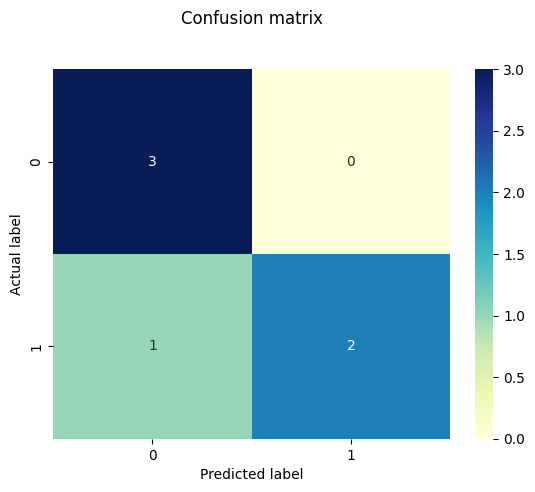

In [86]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Evaluation metrics
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report

In [87]:
#import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [94]:
n_classes = 5

# Assuming `y_test` is not one-hot encoded and `n_classes` is known
y_test_binarized = label_binarize(y_test, classes=[*range(n_classes)])

# Adjust `y_pred_proba` if it's not already probabilities for each class
# Assuming `classifier.predict_proba` method is available and used
y_pred_proba = classifier.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC Curve
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


IndexError: index 2 is out of bounds for axis 1 with size 2